In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import token_file
%matplotlib inline

In [3]:
dataset = pd.read_excel("./data/BD_HackMTY_ChoquesYSiniestrosMONTERREY_2020_V2.xlsx")
dataset.head()

FOLIO_ID        LAT        LONG CODIGO POSTAL               CALLE  \
0   D00005  19.266303  -99.331791            \N              UBERP3   
1   D00007  25.660916 -100.282504         64820  Avenida Revolución   
2   D00011  25.724544 -100.373691         64619              ABEDUL   
3   D00012  25.631471 -100.300988         64760       ALFONSO REYES   
4   D00019  25.728476 -100.333627         64250     Pablo Hernández   

             COLONIA      CAUSA SINIESTRO TIPO VEHICULO   COLOR  \
0         Cuajimalpa  HUELGAS Y ALBOROTOS          Auto   NEGRO   
1  Valle del Huajuco  COLISION Y/O VUELCO          Auto   PLATA   
2       VILLA DORADA  COLISION Y/O VUELCO          Auto    ROJO   
3   15 de Septiembre  COLISION Y/O VUELCO          Auto  BLANCO   
4     FERROCARRILERA  COLISION Y/O VUELCO          Auto  BLANCO   

  MODELO_VEHICULO NIVEL DAÑO VEHICULO       PUNTO DE IMPACTO   AÑO  MES  \
0            2016               Medio                    NaN  2018    1   
1            2006                 NaN                    NaN  2018    1   
2            2015                Bajo    Costado der central  2018    1   
3            2000            Sin daño  Costado izq delantero  2018    1   
4            2015                Bajo  Costado izq delantero  2018    1   

   DÍA NUMERO        DIA  HORA      ESTADO CIUDAD_APROXIMADA       DATE  
0           3  MIERCOLES    16  NUEVO LEÓN         MONTERREY 2018-01-03  
1          22      LUNES    12  NUEVO LEÓN         MONTERREY 2018-01-22  
2           1      LUNES     0  NUEVO LEÓN         MONTERREY 2018-01-01  
3           1      LUNES     2  NUEVO LEÓN         MONTERREY 2018-01-01  
4           1      LUNES     9  NUEVO LEÓN         MONTERREY 2018-01-01

In [4]:
dataset.shape

(43430, 20)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43430 entries, 0 to 43429
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   FOLIO_ID             43430 non-null  object        
 1   LAT                  42450 non-null  float64       
 2   LONG                 42450 non-null  float64       
 3   CODIGO POSTAL        43390 non-null  object        
 4   CALLE                43429 non-null  object        
 5   COLONIA              43411 non-null  object        
 6   CAUSA SINIESTRO      43430 non-null  object        
 7   TIPO VEHICULO        43394 non-null  object        
 8   COLOR                43371 non-null  object        
 9   MODELO_VEHICULO      43396 non-null  object        
 10  NIVEL DAÑO VEHICULO  43127 non-null  object        
 11  PUNTO DE IMPACTO     39625 non-null  object        
 12  AÑO                  43430 non-null  int64         
 13  MES                  43430 non-

Text(0.5, 1.0, 'Missing values')

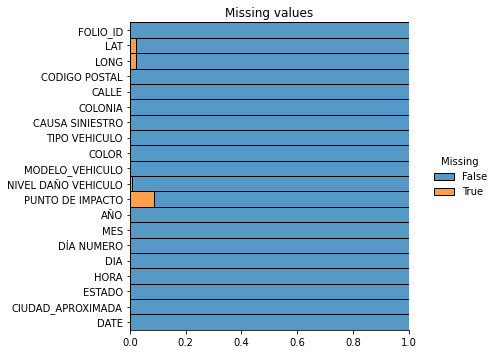

In [6]:
sns.displot(
    data = dataset.isna().melt(value_name="Missing"),
    y = "variable",
    hue="Missing",
    multiple = "fill",
    aspect=1.25
)
plt.ylabel("")
plt.xlabel("")
plt.title("Missing values")

In [7]:
dataset['TIPO VEHICULO'].describe()

count     43394
unique        5
top        Auto
freq      35309
Name: TIPO VEHICULO, dtype: object

In [8]:
dataset['TIPO VEHICULO'].unique()

array(['Auto', 'Camión Ligero', 'Camión', nan, 'Motocicleta', '\\N'],
      dtype=object)

In [9]:
len(dataset['CODIGO POSTAL'].unique())

498

In [10]:
dataset['CODIGO POSTAL'].value_counts()[:10]/len(dataset)

64000     0.124545
64620     0.065853
64590     0.060419
64330     0.055146
64619     0.035667
64200     0.027262
647770    0.026456
6400      0.024154
64988     0.022542
\N        0.022266
Name: CODIGO POSTAL, dtype: float64

In [11]:
dataset[dataset['CODIGO POSTAL']==r'\N'].shape

(967, 20)

In [12]:
postal_df = dataset['CODIGO POSTAL'].value_counts()[:9]
postal_df

64000     5409
64620     2860
64590     2624
64330     2395
64619     1549
64200     1184
647770    1149
6400      1049
64988      979
Name: CODIGO POSTAL, dtype: int64

In [13]:
most_common_pc=list(postal_df.index)
df_map1 = dataset[['LONG','LAT','CODIGO POSTAL']]
df_map1.dropna(axis=0, inplace=True)
df_map1.shape

/tmp/ipykernel_23467/3791675594.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_map1.dropna(axis=0, inplace=True)


(42446, 3)

In [14]:
df_map1 = df_map1[df_map1['CODIGO POSTAL'].isin(most_common_pc)]
df_map1.shape

(19194, 3)

In [15]:

px.set_mapbox_access_token('pk.eyJ1IjoicmFtb25wdW9uIiwiYSI6ImNreW9vM3kydjAyMGoycG55ZmZsenI2bDEifQ.xreL88Eh1Zj3G2R_gwSlkA')
fig = px.scatter_mapbox(df_map1, lat= 'LAT', lon='LONG', color = 'CODIGO POSTAL', color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=9.5)
fig.show()

In [16]:
dataset['TIPO VEHICULO'].value_counts()/len(dataset)

Auto             0.813009
Camión           0.159751
Camión Ligero    0.022128
\N               0.003224
Motocicleta      0.001059
Name: TIPO VEHICULO, dtype: float64

Text(0, 0.5, '')

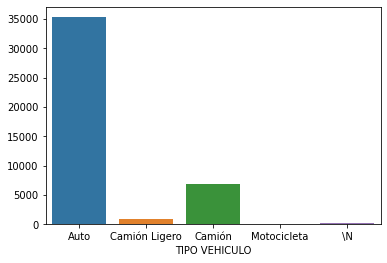

In [17]:
sns.countplot(x = 'TIPO VEHICULO', data=dataset)
plt.ylabel('')

In [18]:
list(dataset['TIPO VEHICULO'].value_counts())

[35309, 6938, 961, 140, 46]

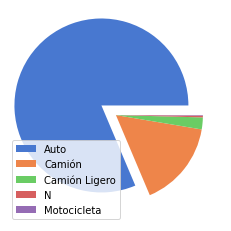

<Figure size 1440x1440 with 0 Axes>

In [19]:
car_label = ['Auto','Camión','Camión Ligero', 'N', 'Motocicleta']
explode = (0.2, 0, 0, 0, 0)
colors = sns.color_palette('muted')[0:5]
plt.pie(list(dataset['TIPO VEHICULO'].value_counts()), colors= colors, explode= explode)
plt.legend(car_label, loc=3)
plt.figure(figsize=(20,20))
plt.show()


In [20]:
dataset['HORA'].value_counts()/len(dataset)

14    0.081142
13    0.079553
18    0.074649
15    0.072346
16    0.070366
17    0.068570
12    0.065600
9     0.065462
19    0.064449
8     0.062653
11    0.059613
10    0.057265
20    0.043749
7     0.036703
21    0.029772
22    0.019180
23    0.012319
6     0.008727
0     0.007691
1     0.005710
2     0.004099
3     0.003776
5     0.003707
4     0.002901
Name: HORA, dtype: float64

Text(0.5, 1.0, 'Distribución de acuerdo a la hora del día')

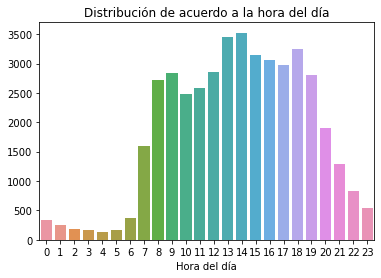

In [21]:
sns.countplot(x = 'HORA', data = dataset)
plt.ylabel("")
plt.xlabel("Hora del día")
plt.title("Distribución de acuerdo a la hora del día")

In [22]:
dataset['DIA'].value_counts()/len(dataset)

VIERNES      0.170021
MARTES       0.162376
MIERCOLES    0.161179
JUEVES       0.158554
LUNES        0.153166
SABADO       0.132604
DOMINGO      0.062100
Name: DIA, dtype: float64

<AxesSubplot:xlabel='DIA', ylabel='count'>

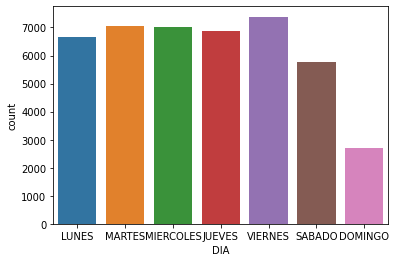

In [76]:
sns.countplot(x='DIA', data = dataset, order=['LUNES','MARTES','MIERCOLES','JUEVES','VIERNES','SABADO','DOMINGO'])

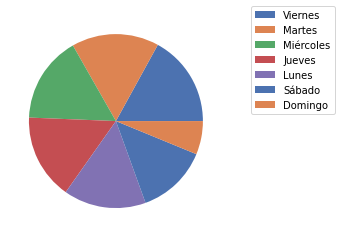

<Figure size 1440x1440 with 0 Axes>

In [24]:
car_label = ['Viernes','Martes','Miércoles', 'Jueves', 'Lunes', 'Sábado','Domingo']
explode = (0.2, 0, 0, 0, 0 ,0 ,0)
colors = sns.color_palette('deep')[0:5]
plt.pie(list(dataset['DIA'].value_counts()), colors= colors)
plt.legend(car_label, bbox_to_anchor=(1.1, 1.05))
plt.figure(figsize=(20,20))
plt.show()


In [25]:
dataset['MES'].value_counts()/len(dataset)

5     0.105066
2     0.102763
1     0.101059
3     0.096684
6     0.095096
4     0.094819
10    0.069445
12    0.068662
11    0.068386
8     0.068271
9     0.067304
7     0.062445
Name: MES, dtype: float64

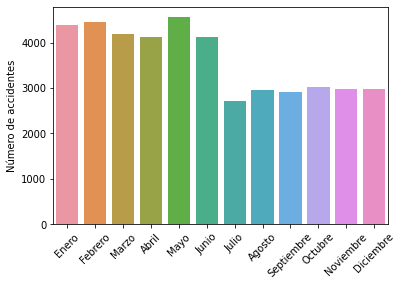

In [103]:
sns.countplot(x= 'MES', data=dataset)
months = ['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
plt.ylabel("Número de accidentes")
plt.xticks(np.arange(12),[months[x] for x in range(0,12)], rotation=45)
plt.xlabel('')
plt.show()

In [77]:
dataset[dataset['NIVEL DAÑO VEHICULO'] == 'Alto'].groupby(dataset['DATE'].dt.dayofweek).count()['NIVEL DAÑO VEHICULO']

DATE
0     7
1    10
2    12
3     4
4    12
5    14
6    19
Name: NIVEL DAÑO VEHICULO, dtype: int64

In [71]:
dataset[dataset['NIVEL DAÑO VEHICULO'] == 'Alto'].groupby(dataset['DIA']).count()['NIVEL DAÑO VEHICULO']

DIA
DOMINGO      19
JUEVES        4
LUNES         7
MARTES       10
MIERCOLES    12
SABADO       14
VIERNES      12
Name: NIVEL DAÑO VEHICULO, dtype: int64

In [78]:
daño_alto = dataset[dataset['NIVEL DAÑO VEHICULO'] == 'Alto'].groupby(dataset['DATE'].dt.dayofweek).count()['NIVEL DAÑO VEHICULO']
tasa_daño_alto = daño_alto/daño_alto.sum()
tasa_daño_alto

DATE
0    0.089744
1    0.128205
2    0.153846
3    0.051282
4    0.153846
5    0.179487
6    0.243590
Name: NIVEL DAÑO VEHICULO, dtype: float64

In [79]:
daño_medio = dataset[dataset['NIVEL DAÑO VEHICULO'] == 'Medio'].groupby(dataset['DATE'].dt.dayofweek).count()['NIVEL DAÑO VEHICULO']
tasa_daño_medio = daño_medio/daño_medio.sum()
tasa_daño_medio

DATE
0    0.108597
1    0.151584
2    0.162896
3    0.133484
4    0.199095
5    0.126697
6    0.117647
Name: NIVEL DAÑO VEHICULO, dtype: float64

In [80]:
daño_bajo = dataset[dataset['NIVEL DAÑO VEHICULO'] == 'Bajo'].groupby(dataset['DATE'].dt.dayofweek).count()['NIVEL DAÑO VEHICULO']
tasa_daño_bajo = daño_bajo/daño_bajo.sum()
tasa_daño_bajo

DATE
0    0.150065
1    0.162311
2    0.160061
3    0.160017
4    0.168845
5    0.133189
6    0.065513
Name: NIVEL DAÑO VEHICULO, dtype: float64

In [109]:
rates

Daño alto  Daño medio  Daño bajo
DATE                                  
0      0.089744    0.108597   0.150065
1      0.128205    0.151584   0.162311
2      0.153846    0.162896   0.160061
3      0.051282    0.133484   0.160017
4      0.153846    0.199095   0.168845
5      0.179487    0.126697   0.133189
6      0.243590    0.117647   0.065513

Text(0, 0.5, 'Tasa de Accidentes')

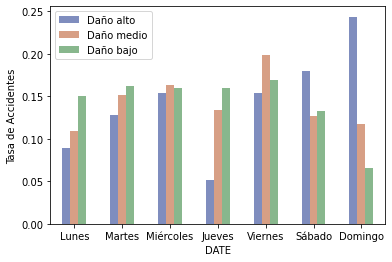

In [114]:
import calendar
colors = sns.color_palette('dark')[0:5]
days = ['Lunes','Martes','Miércoles','Jueves','Viernes','Sábado','Domingo']
rates = pd.DataFrame({'Daño alto': tasa_daño_alto, 'Daño medio':tasa_daño_medio, 'Daño bajo':tasa_daño_bajo})
rates.plot(kind='bar',color=colors,alpha=0.5)
plt.xticks(np.arange(7),[days[x] for x in range(0,7)], rotation=0);
plt.ylabel('Tasa de Accidentes')

In [59]:
dataset[dataset['NIVEL DAÑO VEHICULO'] == 'Bajo'].groupby(dataset['DIA']).count()['NIVEL DAÑO VEHICULO']

DIA
DOMINGO      1514
JUEVES       3698
LUNES        3468
MARTES       3751
MIERCOLES    3699
SABADO       3078
VIERNES      3902
Name: NIVEL DAÑO VEHICULO, dtype: int64

In [60]:
dataset[dataset['NIVEL DAÑO VEHICULO'] == 'Sin daño'].groupby(dataset['DIA']).count()['NIVEL DAÑO VEHICULO']

DIA
DOMINGO       891
JUEVES       2648
LUNES        2678
MARTES       2765
MIERCOLES    2752
SABADO       2151
VIERNES      2849
Name: NIVEL DAÑO VEHICULO, dtype: int64

<AxesSubplot:xlabel='AÑO', ylabel='count'>

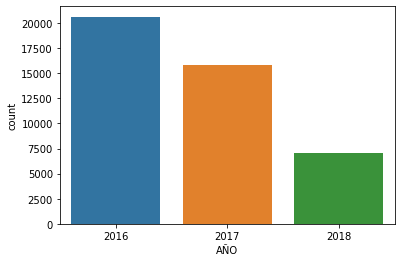

In [28]:
sns.countplot(x='AÑO', data=dataset)

In [29]:
dataset['NIVEL DAÑO VEHICULO'].value_counts()/len(dataset)

Bajo        0.532121
Sin daño    0.385310
\N          0.063620
Medio       0.010177
Alto        0.001796
Name: NIVEL DAÑO VEHICULO, dtype: float64

<AxesSubplot:xlabel='NIVEL DAÑO VEHICULO', ylabel='count'>

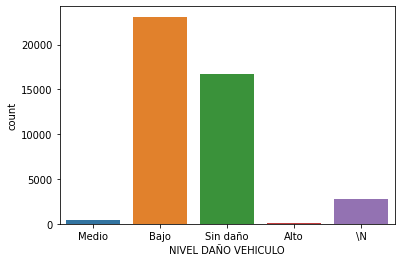

In [30]:
sns.countplot(x= 'NIVEL DAÑO VEHICULO', data=dataset)

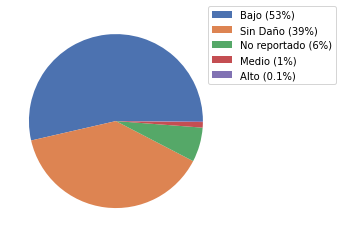

<Figure size 1440x1440 with 0 Axes>

In [31]:
car_label = ['Bajo (53%)','Sin Daño (39%)','No reportado (6%)', 'Medio (1%)', 'Alto (0.1%)']
explode = (0.2, 0, 0, 0, 0 ,0 ,0)
colors = sns.color_palette('deep')[0:5]
plt.pie(list(dataset['NIVEL DAÑO VEHICULO'].value_counts()), colors= colors)
plt.legend(car_label, bbox_to_anchor=(0.9, 1.05))
plt.figure(figsize=(20,20))
plt.show()


In [32]:
df_map = dataset[['LONG','LAT','NIVEL DAÑO VEHICULO']]

In [33]:
df_map.dropna(axis=0, inplace=True)
df_map

/tmp/ipykernel_23467/1379289664.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



LONG        LAT NIVEL DAÑO VEHICULO
0      -99.331791  19.266303               Medio
2     -100.373691  25.724544                Bajo
3     -100.300988  25.631471            Sin daño
4     -100.333627  25.728476                Bajo
5     -100.412453  25.762693            Sin daño
...           ...        ...                 ...
43423 -100.549290  25.025557                Bajo
43424 -100.878383  25.593055                  \N
43427 -100.312296  25.660844                Bajo
43428 -100.360152  25.745930            Sin daño
43429  -93.025856  17.953086                  \N

[42151 rows x 3 columns]

In [34]:
import token_file
px.set_mapbox_access_token(token_file.acces_token)
fig = px.scatter_mapbox(df_map, lat= 'LAT', lon='LONG', color = 'NIVEL DAÑO VEHICULO', color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=8)
fig.show()

In [35]:
dataset['CAUSA SINIESTRO'].unique()

array(['HUELGAS Y ALBOROTOS', 'COLISION Y/O VUELCO', 'ATROPELLO',
       'INCENDIO RAYO O EXPLOSION', 'DAÑOS POR LA CARGA',
       'FENOMENOS DE LA NATURALEZA', 'TRANSPORTACION'], dtype=object)

In [36]:
dataset['CAUSA SINIESTRO'].value_counts()

COLISION Y/O VUELCO           42956
FENOMENOS DE LA NATURALEZA      247
ATROPELLO                       159
INCENDIO RAYO O EXPLOSION        29
TRANSPORTACION                   22
DAÑOS POR LA CARGA               10
HUELGAS Y ALBOROTOS               7
Name: CAUSA SINIESTRO, dtype: int64

In [37]:
dataset['PUNTO DE IMPACTO'].value_counts()

Frontal                  10472
Trasero                   9951
Cofre                     4558
Costado der delantero     3521
Costado izq delantero     2906
Costado der trasero       2356
Costado izq trasero       2155
Costado der central       1579
Costado izq central       1306
Parte baja                 370
Toldo                      281
\N                         139
Tapa cajuela                31
Name: PUNTO DE IMPACTO, dtype: int64

<AxesSubplot:xlabel='count', ylabel='PUNTO DE IMPACTO'>

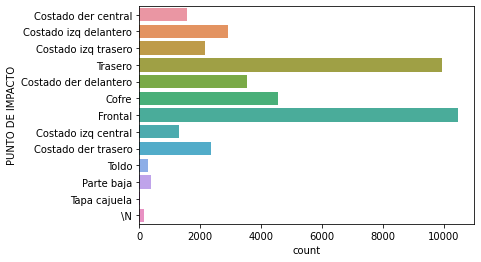

In [38]:
sns.countplot(y='PUNTO DE IMPACTO', data=dataset)


In [39]:
dataset['COLOR'].value_counts()

BLANCO        11323
GRIS           7263
ROJO           3716
PLATA          3192
NEGRO          2753
              ...  
BLANCO ROJ        1
AMARILLO B        1
2016 bco          1
Bco 1988          1
BLANCA/AZU        1
Name: COLOR, Length: 1297, dtype: int64

In [40]:
dataset['COLOR']=dataset['COLOR'].str.replace(r"(?i).*gris.*", 'GRIS', regex=True)
dataset['COLOR']=dataset['COLOR'].str.replace(r"(?i).*blan.*", 'BLANCO', regex=True)
dataset['COLOR']=dataset['COLOR'].str.replace(r"(?i).*bco.*", 'BLANCO', regex=True)
dataset['COLOR']=dataset['COLOR'].str.replace(r"(?i).*azul.*", 'AZUL', regex=True)
dataset['COLOR']=dataset['COLOR'].str.replace(r"(?i).*verd.*", 'VERDE', regex=True)
dataset['COLOR']=dataset['COLOR'].str.replace(r"(?i).*negr.*", 'NEGRO', regex=True)
dataset['COLOR']=dataset['COLOR'].str.replace(r"(?i).*roj.*", 'ROJO', regex=True)
dataset['COLOR']=dataset['COLOR'].str.replace(r"(?i).*gris.*", 'GRIS', regex=True)
dataset['COLOR']=dataset['COLOR'].str.replace(r"(?i).*nara.*", 'NARANJA', regex=True)
dataset['COLOR']=dataset['COLOR'].str.replace(r"(?i).*amari.*", 'AMARILLO', regex=True)
dataset['COLOR']=dataset['COLOR'].str.replace(r"(?i).*vino.*", 'VINO', regex=True)
dataset['COLOR']=dataset['COLOR'].str.replace(r"(?i).*plata.*", 'PLATA', regex=True)
dataset['COLOR']=dataset['COLOR'].str.replace(r"(?i).*cafe.*", 'CAFE', regex=True)
dataset['COLOR']=dataset['COLOR'].str.replace(r"(?i).*guind.*", 'GUINDA', regex=True)
dataset['COLOR']=dataset['COLOR'].str.replace(r"(?i).*arena.*", 'ARENA', regex=True)
dataset['COLOR']=dataset['COLOR'].str.replace(r"(?i).*dora.*", 'DORADO', regex=True)
dataset['COLOR'].value_counts()


BLANCO      14265
GRIS         8593
ROJO         4287
PLATA        3457
NEGRO        3243
            ...  
GRUA            1
GIRS/12         1
Sinergia        1
almendra        1
TUCSON          1
Name: COLOR, Length: 356, dtype: int64

In [41]:
color_index = dataset['COLOR'].value_counts()
most_common_colors = list(color_index.index[:20])
df_colors = dataset[dataset['COLOR'].isin(most_common_colors)]
df_colors.shape


(42622, 20)

In [42]:
df_colors['COLOR'].value_counts()

BLANCO      14265
GRIS         8593
ROJO         4287
PLATA        3457
NEGRO        3243
AZUL         2829
ARENA        1477
VERDE        1040
GUINDA        703
AMARILLO      612
\N            443
VINO          439
DORADO        389
CAFE          360
NARANJA       182
BEIGE          94
CELESTE        64
ORO            54
CREMA          48
PLATEADO       43
Name: COLOR, dtype: int64

Text(0, 0.5, '')

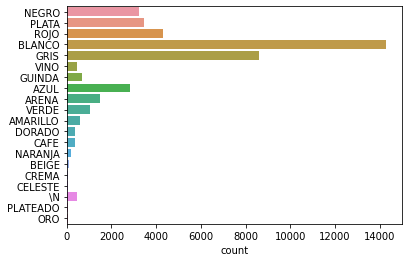

In [43]:
sns.countplot(y='COLOR', data=df_colors)
plt.ylabel('')
